Data Visualization
---


In [17]:
import numpy as np
import pandas as pd
import pandas.io.data as web
import matplotlib.pyplot as plt
%matplotlib inline

- Let's start with a simple example

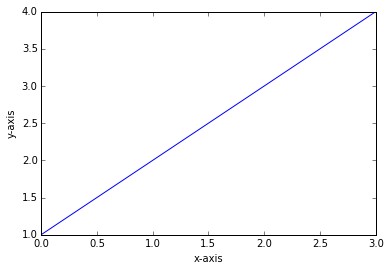

In [18]:
y = ([1,2,3,4])
plt.plot(y)
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.show()

- Why does the figure start at $y=1$ and $x=0$?

- The $.plot()$ command can take an arbitrary number of arguments, for example, to plot $x$ versus $y$, we would use the following command:

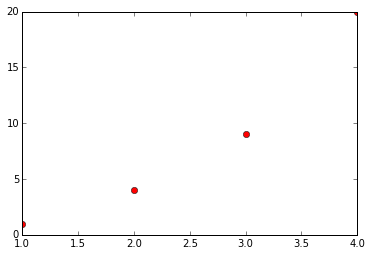

In [19]:
x = [1,2,3,4]
y = [1,4,9,20]

plt.plot(x,y,'ro')
plt.show()

- Sometimes the axes cuts off the beginning and ending point so we can specifically define the axis lengths

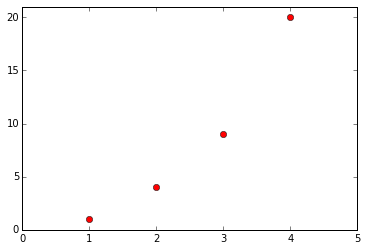

In [20]:
plt.plot(x,y,'ro')
plt.axis([0,5,0,21])
plt.show()

- The $.axis()$ command is the generalized command for defining the domain and range of your figure
- It takes a list, with the order $[  xmin,   xmax,   ymin,   ymax]$
- We can also specifically set the domain and range using the $.xlim()$ and $.ylim()$ commands

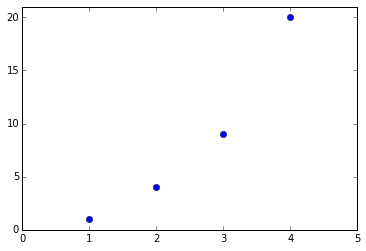

In [21]:
plt.plot(x,y,'bo')
plt.xlim([0,5])
plt.ylim([0,21])
plt.show()

- In general you will be working with arrays, matplotlib automatically converts your data into an array in the backend 
- The following example shows how to plot several lines with different formatting styles 

In [22]:
t = np.linspace(1,50,50)
t

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.])

- Here we are going to use red dashes, blue squares, and green triangles
- We can even set the location of the legend, here $loc=0$ tells matplotlib to find the best location for the legend

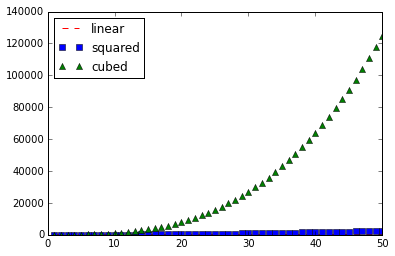

In [23]:
plt.plot(t, t, 'r--', label='linear')
plt.plot(t, t**2, 'bs', label='squared')
plt.plot(t, t**3, 'g^',label ='cubed')
plt.legend(loc=0)
plt.show()

Working with Multiple figures and axes
---

- Here is a simple way to create subplots, lets try three
- Here we are using the $.DataReader()$ command to scrape data from fred (make sure you have internet connection or this wont work!)

In [24]:
start = '01/01/1960'
end   = '01/01/2013' 

gdp = web.DataReader('GDPC1'  , 'fred', start, end)
con = web.DataReader('PCECC96', 'fred', start, end)
inv = web.DataReader('GPDIC96', 'fred', start, end)

time = gdp.index

gdp.head()

,GDPC1
DATE,
1960-01-01,3123.2
1960-04-01,3111.3
1960-07-01,3119.1
1960-10-01,3081.3
1961-01-01,3102.3


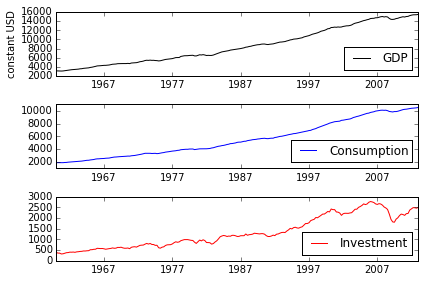

In [25]:
plt.figure(1)

plt.subplot(3,1,1)
plt.plot(time, gdp, 'k', label= 'GDP')
plt.ylabel('constant USD')
plt.legend(loc= 4)

plt.subplot(3,1,2)
plt.plot(time, con, 'b', label= 'Consumption')
plt.legend(loc=4)
 
plt.subplot(3,1,3)
plt.plot(time, inv, 'r', label= 'Investment')
plt.legend(loc=4)

plt.tight_layout()
plt.show()

- Here the $.tightlayout()$ command makes sure that your subplots are evenly spaced
- Also the $.legend()$ command creates a legend for your data if you have specified a label 
- But what if we wanted consumption and investment on the same figure?
- For this it would be useful to use an Object-Oriented approach using the $.twinx()$ command

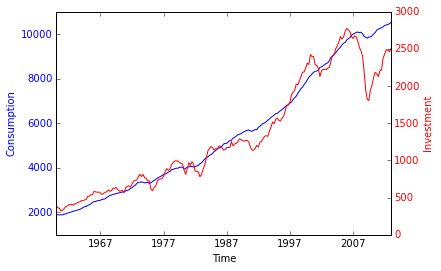

In [26]:
fig, ax1 = plt.subplots()

ax1.plot(time, con, 'b-')
ax1.set_xlabel('Time')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Consumption', color='b')
for tick in ax1.get_yticklabels():
    tick.set_color('b')


ax2 = ax1.twinx()
ax2.plot(time, inv, 'r-')


ax2.set_ylabel('Investment', color='r')
for tick in ax2.get_yticklabels():
    tick.set_color('r')

plt.show()

- Or we can calculate the growth rate and plot them all together

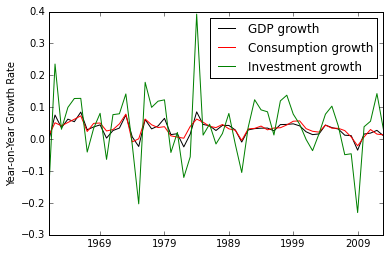

In [27]:
gdp_y = gdp.asfreq('AS', how='start')
con_y = con.asfreq('AS', how='start')
inv_y = inv.asfreq('AS', how='start')

Gdp_growth = gdp_y.pct_change()
Con_growth = con_y.pct_change()
Inv_growth = inv_y.pct_change()

time = gdp_y.index

plt.plot(time,Gdp_growth, color= 'black', label = 'GDP growth')
plt.plot(time,Con_growth, color= 'red', label = 'Consumption growth')
plt.plot(time,Inv_growth, color= 'green', label = 'Investment growth')
plt.ylabel('Year-on-Year Growth Rate')
plt.legend()
plt.show()

Importing data from Excel and working with text
---
- It is surprisingly simple with pandas .read_excel() command

In [28]:
mrw = pd.read_excel('mrw.xls')
mrw.head()

,Country,c_code,continent,Non-oil,Intermediate Sample,oecd,gdp60,gdp85,popgrowth,igdp,school
1,Algeria,DZA,Africa,Non-oil,Intermediate Sample,Non-OECD,2485,4371,2.6,24.100000,4.5
2,Angola,AGO,Africa,Non-oil,Not intermediate sample,Non-OECD,1588,1171,2.1,5.800000,1.8
3,Benin,BEN,Africa,Non-oil,Not intermediate sample,Non-OECD,1116,1071,2.4,10.800000,1.8
4,Botswana,BWA,Africa,Non-oil,Intermediate Sample,Non-OECD,959,3671,3.2,28.299999,2.9
5,Burkina Faso,BFA,Africa,Non-oil,Not intermediate sample,Non-OECD,529,857,0.9,12.700000,0.4


- It's very important to look at your data! The most basic univarite plot is a histogram. Pandas has a lot of built-in methods for plotting using matplotlib. You can always create graphics using the standard matplotlib commands.

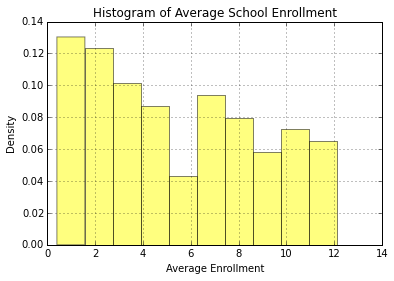

In [29]:
fig = plt.figure()

# use pandas built-in method to create the histogram
ax = mrw['school'].hist(color='yellow', normed=True, alpha = 0.5)

# add labels and a title
ax.set_xlabel('Average Enrollment')
ax.set_ylabel('Density')
ax.set_title('Histogram of Average School Enrollment')

plt.show()

- A good way to compare subsets of data is a box plot.  A box plot will display boxes bordered at the 25<sup>th</sup> and 75<sup>th</sup> percentiles of the variable with a median line at the 50<sup>th</sup> percentile.  Box plots also have whiskers which, typically, extend 1.5 times the IQR beyond the 2<sup>nd</sup> and 3<sup>rd</sup> quartiles. 
- Here we use the $.text()$ command to add some text to our figure, this command has many options.


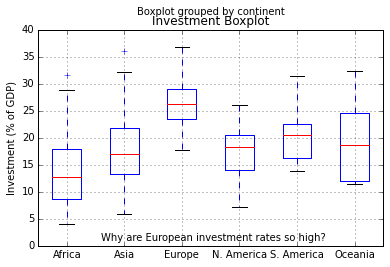

In [30]:
fig = plt.figure()

ax = mrw[['continent', 'igdp']].boxplot(by='continent')
ax.set_xlabel('')
ax.set_xticklabels(['Africa', 'Asia', 'Europe', 'N. America', 'S. America', 'Oceania'])
ax.set_ylabel('Investment (% of GDP)')
ax.set_title('Investment Boxplot')
ax.text(1.6,1,'Why are European investment rates so high?')

plt.show()

- We are also interested in how variables relate to one another. The most basic bivariate data view is the scatterplot. To see how real GDP per worker in 1985 relates to average population growth in the previous 25 years...
- Here we are also going to use the $.annotate()$ command to annotate our figure

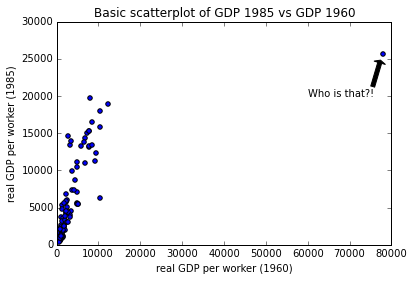

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

X = mrw.gdp60.values
Y = mrw.gdp85.values

ax.scatter(X, Y)
ax.set_xlim(0, 80000)
ax.set_xlabel('real GDP per worker (1960)')
ax.set_ylim(0, 30000)
ax.set_ylabel('real GDP per worker (1985)')
ax.set_title('Basic scatterplot of GDP 1985 vs GDP 1960')
ax.annotate('Who is that?!', 
            xy=(77500.5,25014.4), 
            xytext= (60000.0,20000.0),
            arrowprops= dict(facecolor='black', shrink = 0.05))


plt.show()

- Here is an example of a simple bar chart for average population growth by continent
- First we have to group our data by continent using the $.groupby()$ command

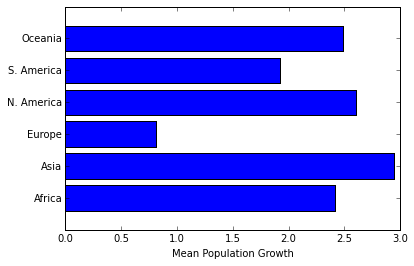

In [16]:
grouped = mrw.groupby('continent')
mean_popgrowth= grouped.popgrowth.mean()

continent = ('Africa', 'Asia', 'Europe', 'N. America', 'S. America', 'Oceania')
y_position = np.arange(len(continent))

fig = plt.figure()

plt.barh(y_position, mean_popgrowth, align = 'center')
plt.yticks(y_position, continent)
plt.xlabel('Mean Population Growth')

plt.show()


- Here are some extremely useful references:
- http://www.labri.fr/perso/nrougier/teaching/matplotlib/#regular-plots
- http://kestrel.nmt.edu/~raymond/software/python_notes/paper004.html
- http://matplotlib.org/index.html    

- I'll stop here, but keep in mind that matplotlib is well equiped to produce 3D figures as well as annimated figures, if you'd like to know more send me an email and we can discuss
- There are unlimited options!

Practice Makes Perfect!
---
Thank you!
---